# Plotiing NN Fuction on the input domain

In [1]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib widget

In [2]:
@dataclass
class ActFunc:
    func_str: str = None
    c = 0
    b = 1
    bigger_than = 0
    if_bigger = 1
    if_smaller = -1
    
    def sigmoid(self, y: np.ndarray) -> np.ndarray:
        self.func_str = 'sigmoid'
        return 1/(1 + np.exp(-y))

    def hard_limit(self, y: np.ndarray) -> np.ndarray:
        self.func_str = 'hard_limit'
        return np.where(y >= self.bigger_than, self.if_bigger, self.if_smaller)

    def radial_basis(self, y: np.ndarray) -> np.ndarray:
        self.func_str = f'radial_basis_c-{self.c}_b-{self.b}'
        return np.exp((-(y-self.c)**2) * self.b)

activation_func = ActFunc()

# Plotting One Perceptron

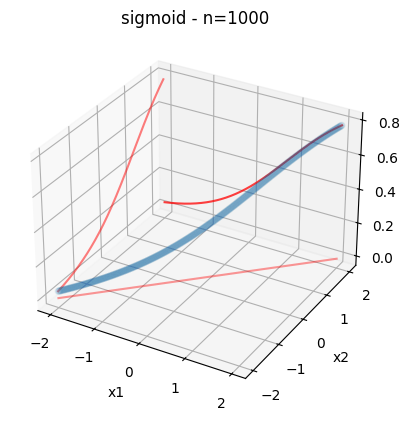

In [21]:
##### init variables
# number of points
n = 1000
sigma = activation_func.sigmoid  # sigmoid | hard_limit | radial_basis

# generate some random points
x1 = np.linspace(-2, 2, n)
x2 = np.linspace(-2, 2, n)

def y (x1: np.ndarray, x2:np.ndarray, sigma:object) -> np.ndarray:
    return sigma(-4.79 * x1 + 5.9 * x2 - 0.93)

z = y(x1, x2, sigma)

# plot the points in 3D
fit, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter(x1, x2, z, alpha=0.03)

ax.plot(x1, z, zdir='y', zs=2, c='red', alpha=0.75)
ax.plot(x2, z, zdir='x', zs=-2, c='red', alpha=0.5)
ax.plot(x1, x2, zdir='z', zs=0, c='red', alpha=0.4)


# ax.set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5), zlim=(-0.25, 1.25),
#        xlabel='X', ylabel='Y', zlabel='Z')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f'{activation_func.func_str} - {n=}')

plt.show()



In [ ]:

##### creating 3d plot
# https://www.educba.com/seaborn-3d-plot/
# returns replicas of x1 and x2 across rows and columns respectively making both x1 and x2 a square matrix.
# X1, X2 = np.meshgrid(x1, x2)
# Y = y(X1, X2, sigma=sigma)

# # creating the plot
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surface = ax.plot_surface(X1, X2, Y,
#                           cmap='coolwarm',
#                           edgecolor='royalblue', lw=0.1, rstride=15, cstride=15, alpha=0.7
                        #   )

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
# https://matplotlib.org/stable/gallery/mplot3d/contourf3d_2.html#sphx-glr-gallery-mplot3d-contourf3d-2-py

# ax.contourf(X1, X2, Y, zdir='z', offset=-0.25, cmap='coolwarm')
# ax.contourf(X1, X2, Y, zdir='x', offset=-2.5, cmap='coolwarm')
# ax.contourf(X1, X2, Y, zdir='y', offset=2.5, cmap='coolwarm')

# ax.set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5), zlim=(-0.25, 1.25),
#        xlabel='X', ylabel='Y', zlabel='Z')

# setting labels and title
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('y')
# ax.set_title(f'{activation_func.func_str} - {n=}')

# # saving the plot
# plt.savefig(f'{activation_func.func_str}-{n}.svg', dpi=300)
# plt.savefig(f'{activation_func.func_str}-{n}.png', dpi=300)

plt.show()
plt.close()

# Plotting 2 Layer NN

In [ ]:
x1 = np.array([1, 1, 1, 1])
x2 = np.array([0, 0, 0, 0])

np.array([x1, x2])

In [ ]:
def y(x1: np.ndarray, x2:np.ndarray, sigma:object) -> np.ndarray:
    x = np.array([x1, x2])
    vt = np.array([[-2.69, -2.8],
                   [-3.39, -4.56]])
    bv = np.array([-2.21, 4.76]).reshape(2, 1)  # we reshaped to make it broadcastable
    w = np.array([-4.91, 4.95])
    bw = -2.28

    # first layer output
    z = np.dot(vt, x)+bv



    return z




y(x1, x2, sigma=activation_func.sigmoid)